In [1]:
import pandas as pd
import numpy as np

In [2]:
insurance_data = pd.read_csv("../Data/insurance.csv")
print('Dataset size:', insurance_data.shape)

print('\nData types for all columns:')
print(insurance_data.dtypes)

print('\nData info:')
print(insurance_data.info())
print()

insurance_data.head()

Dataset size: (1338, 7)

Data types for all columns:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Question 1:
#!pip install statsmodels
import statsmodels.formula.api as smf

# Fit a linear model using the response (charges)
# and the continuous predictor variables (age, bmi, children)
linear_model = smf.ols("charges ~ age + bmi + children", data = insurance_data).fit()

# Summarize the model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           8.80e-37
Time:                        16:49:29   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6916.2433   1757.480     -3.935      0.0

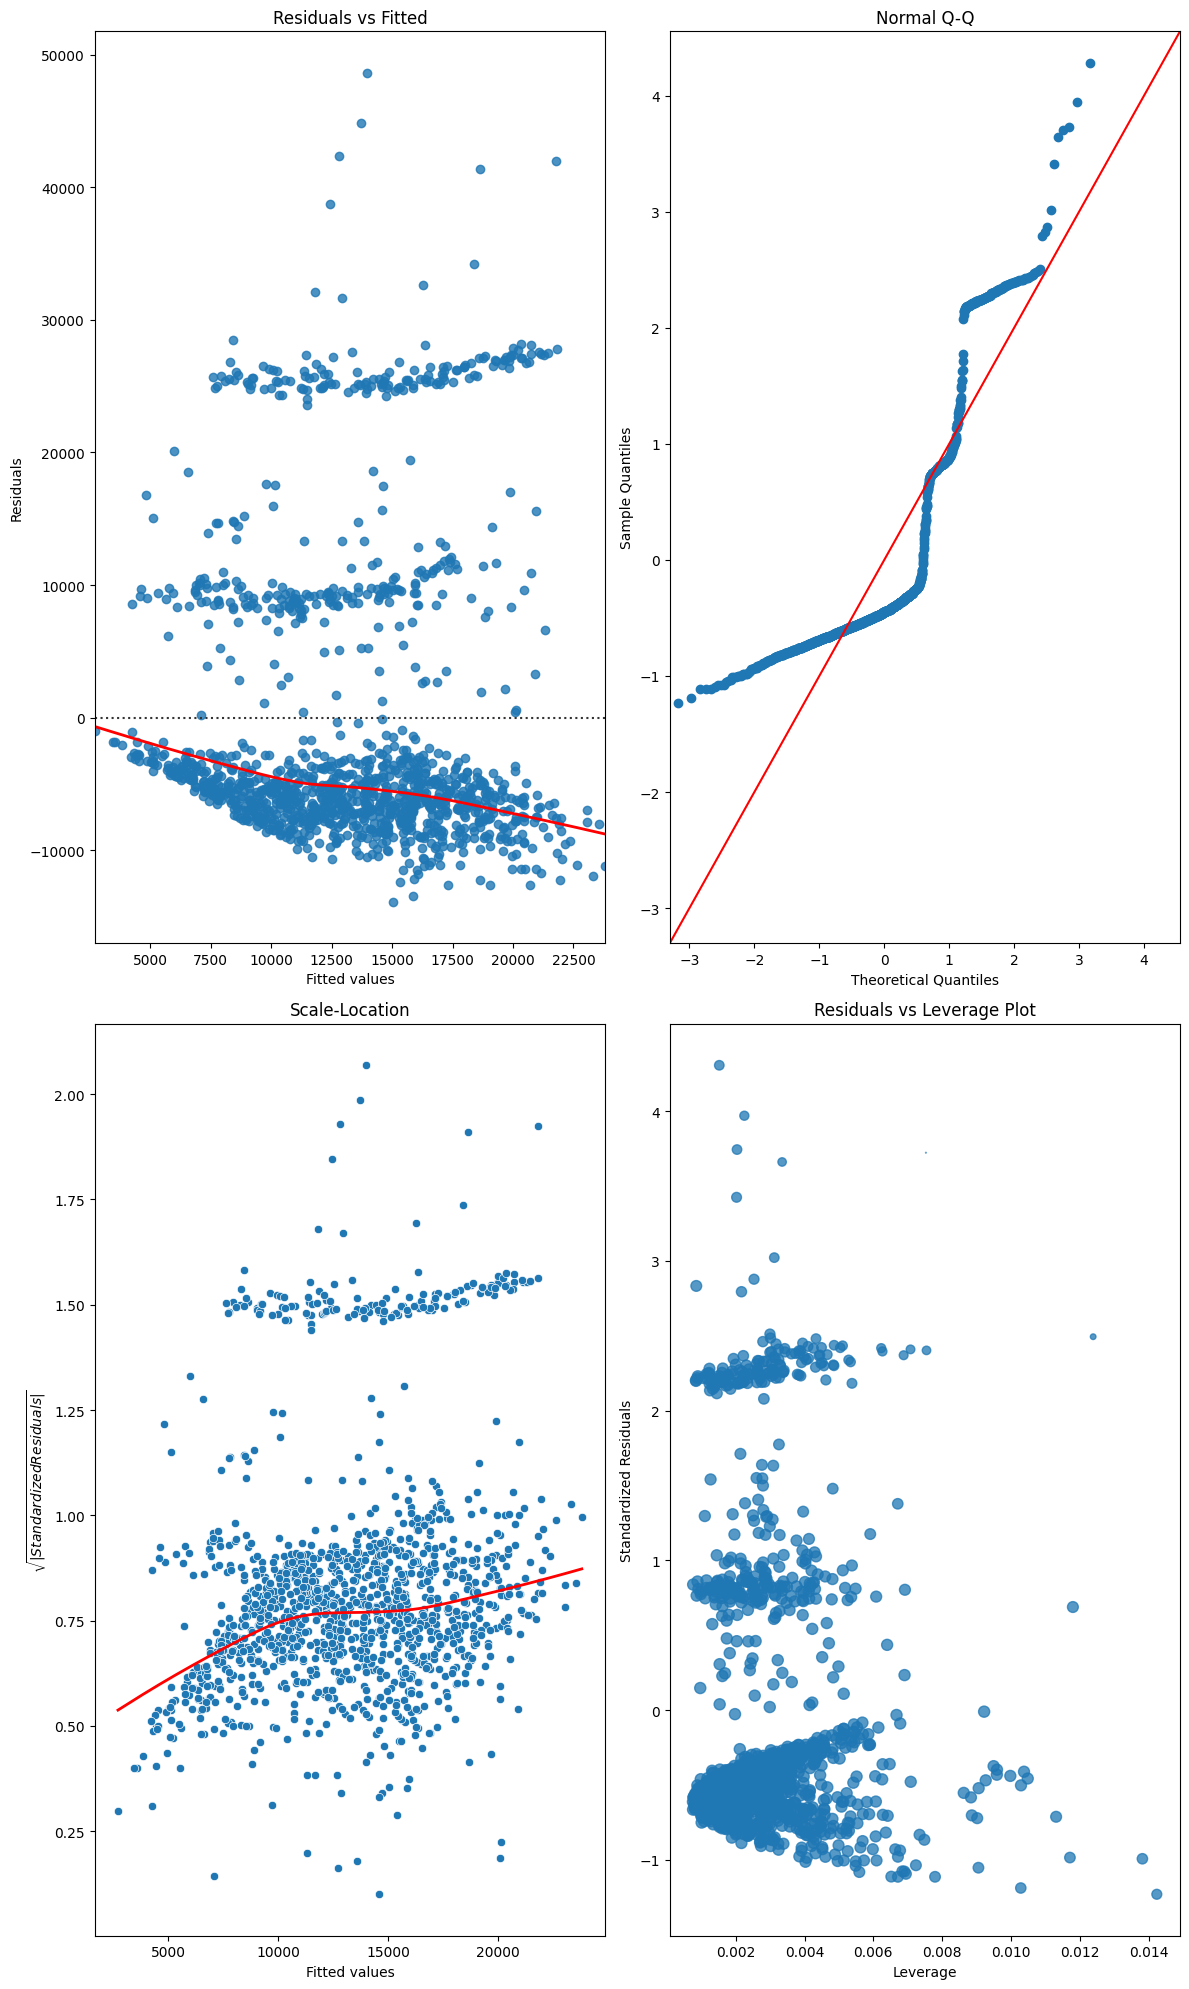

In [4]:
# Question 2:
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns
import statsmodels.api as sm

# Create diagnostic plots
residuals = linear_model.resid
fitted = linear_model.fittedvalues
standardized_residuals = linear_model.get_influence().resid_studentized_internal
sqrt_standardized_residuals = np.sqrt(np.abs(standardized_residuals))

# Set up plots
fig, axs = plt.subplots(2, 2, figsize=(12,20))

# Residuals vs Fitted
sns.residplot(x=fitted,
              y=residuals, 
              lowess=True, 
              ax=axs[0, 0],
              line_kws={'color': 'red', 'lw': 2, 'alpha': 1})
axs[0, 0].set_title('Residuals vs Fitted')
axs[0, 0].set_xlabel('Fitted values')
axs[0, 0].set_ylabel('Residuals')

# Normal QQ
sm.qqplot(standardized_residuals,
          line='45', 
          ax=axs[0, 1])
axs[0, 1].set_title('Normal Q-Q')

# Scale Location
sns.scatterplot(x=fitted,
                y=sqrt_standardized_residuals,
                ax=axs[1, 0])
sns.regplot(x=fitted,
            y=sqrt_standardized_residuals,
            scatter=False,
            ci=False,
            lowess=True,
            ax=axs[1, 0],
            line_kws={'color': 'red', 'lw': 2, 'alpha': 1})
axs[1, 0].set_title('Scale-Location')
axs[1, 0].set_xlabel('Fitted values')
axs[1, 0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

# Residuals vs Leverage
sm.graphics.influence_plot(linear_model, 
                           ax=axs[1, 1], 
                           criterion="cooks",
                           size=0.5)
axs[1, 1].set_title('Residuals vs Leverage Plot')
axs[1, 1].set_xlabel("Leverage", fontsize=10)
axs[1, 1].set_ylabel("Standardized Residuals", fontsize=10)

# Remove text labels (they are separate Text objects)
for txt in axs[1, 1].texts:
  txt.set_visible(False)

plt.tight_layout()
plt.show()